In [49]:
import matplotlib.pyplot as plt
import pandas
import MySQLdb
%matplotlib inline

conn = MySQLdb.connect(host="localhost", user="root", passwd="root", db="minion")

query = """ 
SELECT ts, t FROM report WHERE id = 1 and ts >= now() - INTERVAL 1 DAY limit 10;
"""

dictCursor = conn.cursor(MySQLdb.cursors.Cursor)
dictCursor.execute(query)
data = dictCursor.fetchall()

data

r = []
for row in data:
    r.append(row[0])

r[0]


datetime.datetime(2017, 1, 15, 14, 5, 50)

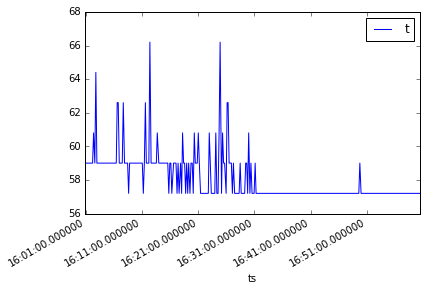

In [87]:
import matplotlib.pyplot as plt
import pandas
import MySQLdb
%matplotlib inline

conn = MySQLdb.connect(host="localhost", user="root", passwd="root", db="minion")

query = """ 
SELECT ts, t /* ((lux * -1)+2500)/30 as lux */ FROM report WHERE id = 1 and ts >= now() - INTERVAL 1 HOUR;
"""

df = pandas.read_sql(query, conn, index_col=['ts'])
fig, ax = plt.subplots()
df.plot(ax=ax)
fig.show()
conn.close()


In [84]:
import pandas_highcharts
import pandas
import MySQLdb

from pandas_highcharts.core import serialize

conn = MySQLdb.connect(host="localhost", user="root", passwd="root", db="minion")

query = """ 
SELECT ts, t FROM report WHERE id = 1 and ts >= now() - INTERVAL 1 DAY;
"""

df = pandas.read_sql(query, conn, index_col=['ts'])
chart = pandas_highcharts.serialize(df, render_to='my-chart', output_type='json')
conn.close()


AttributeError: 'module' object has no attribute 'serialize'

In [21]:
import pyowm
owm = pyowm.OWM('801f832e009fb642af6c78c2c31b7043')
observation = owm.weather_at_place('Concord,NH')
w = observation.get_weather()
w.get_temperature('fahrenheit') 
# {u'speed': 3.1, u'deg': 220}
# w.get_humidity

{'temp': 26.2, 'temp_kf': None, 'temp_max': 28.4, 'temp_min': 21.2}

In [22]:
import charts
import json

ohlc['display'] = False

conn = MySQLdb.connect(host="localhost", user="root", passwd="root", db="minion")

query = """ 
SELECT ts, t FROM report WHERE id = 1 and ts >= now() - INTERVAL 1 DAY LIMIT 4;
"""

#dictCursor = conn.cursor(MySQLdb.cursors.DictCursor)
dictCursor = conn.cursor(MySQLdb.cursors.Cursor)

dictCursor.execute(query)
data = dictCursor.fetchall()
l = list(data)
l
exit()
options = dict(height=400, title=dict(text='My first chart!'))

charts.plot(l, options, height=500, stock=True, show='inline')

conn.close()

Server running in the folder /home/matt/minions/data at 127.0.0.1:47223


NameError: name 'ohlc' is not defined

In [26]:
import json
raw_json = '{"id": 2, "temp": 60.8, "humidity": 23.0}'
result_json = json.loads(raw_json, encoding='utf-8')
result_json.get('lux',None)


In [32]:
m = {'id':2}
def foo(n):
    n['test'] = 10
foo(m)
m

{'id': 2, 'test': 10}

In [33]:
test = {'id':5}
foo(test)
test

{'id': 5, 'test': 10}